### NAME: HRISHIKESH SHIVPUTRA KAMBLE
### PROJECT:-
SOLVING CLASSIFICATION PREDICTION FOR "BRAIN STROKE" DATASET USING 
"LOGISTIC REGRESSION, NAIVES BAYES CLASSIFICATION,SUPPORT VECTOR CLASSIFIER,K NEAREST NEIGHBOUR, DESICION TREE CLASSIFIER".

### DATA:-

1) GENDER: "MALE", "FEMALE" OR "OTHER"


2) AGE: AGE OF THE PATIENT


3) HYPERTENSION: 0 IF THE PATIENT DOESN'T HAVE HYPERTENSION, 1 IF THE PATIENT HAS HYPERTENSION


4) HEART DISEASE: 0 IF THE PATIENT DOESN'T HAVE ANY HEART DISEASES, 1 IF THE PATIENT HAS A HEART DISEASE


5) EVER-MARRIED: "NO" OR "YES"


6) WORK TYPE: "CHILDREN", "GOVTJOV", "NEVER WORKED", "PRIVATE" OR "SELF-EMPLOYED"


7) RESIDENCETYPE: "RURAL" OR "URBAN"


8) AVG GLUCOSE LEVEL: AVERAGE GLUCOSE LEVEL IN BLOOD


9) BMI: BODY MASS INDEX


10) SMOKING_STATUS: "FORMERLY SMOKED", "NEVER SMOKED", "SMOKES" OR "UNKNOWN"


11) STROKE: 1 IF THE PATIENT HAD A STROKE OR 0 IF NOT


### APPROACH:

1.LOAD THE REQUIRED LIBRARIES SUCH AS PANDAS,MATPLOTLIB,SEABORN ALONG WITH GIVEN DATASET.

2.PERFORM EDA ON THE GIVEN DATASET.

3.CONVERT ALL THE REQUIRED COLUMNS INTO NUMERIAL COLUMNS USING GET DUMMIES FUNCTION FROM PANDAS LIBRARY.

4.CONVERTING ALL REQUIRED FEATURES IN NUMERIAL , CHECK FOR CORRELATION BETWEEN FEATURES AND TARGET AND CONSIDER THE ONLY FEATURES WITH HIGHER CORRELATION.

5.IMPORT "LOGISTIC REGRESSION, NAIVES BAYES CLASSIFICATION,SUPPORT VECTOR CLASSIFIER,K NEAREST NEIGHBOUR", AND SPLIT THE GIVEN DATASET INTO TRAINING AND TESTING DATA USING TRAIN_TEST_SPLIT FUNCTION.THEN CALUCLATE ACCURACY SCORE USING SKLEARN LIBRARY BY IMPORTING METRICS.

6.ONCE WE GET ACCURACY SCORE OF ALL MODELS FOR BOTH TRAING AND TESTING DATA, CREATE A DATAFRAME AND LOAD ALL THE ACCURACY OF ALL MODEL.

7.VISUALIZATION:
   ONCE THE DATASET IS CREATED PLOT THE ACCURACIES OF ALL THE MODELS USING BARPLOT USING MATPLOTLIB.


In [1]:
import pandas as pd                         # LOADING ALL THE REQUIRED LIBRARIES.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Hrishikesh\Desktop\DATA SCIENCE\brain_stroke.csv")

In [3]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
data.isna().sum()     # CHECK NULL VALUES

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
data.info()                       # SHOWS ALL INFORMATION REGARDING THE DATA SUCH AS NULL VALUE, COLUMNS,DATATYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
data.describe()            # SHOWS THE ALL DETAILS REGARDING ALL NUMERICAL COLUMNS

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
data.shape                       # SHOWS THE NUMBER OF ROWS AND COLUMNS

(4981, 11)

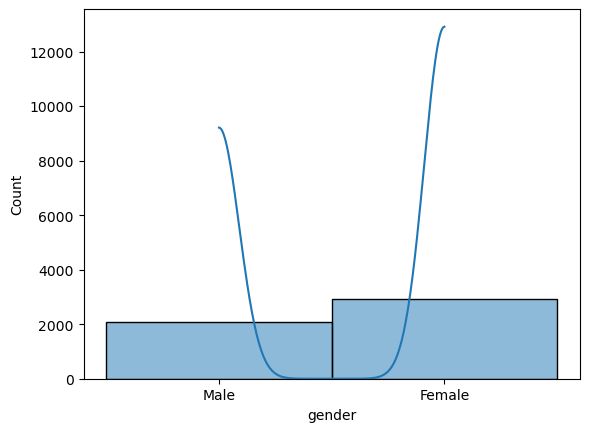

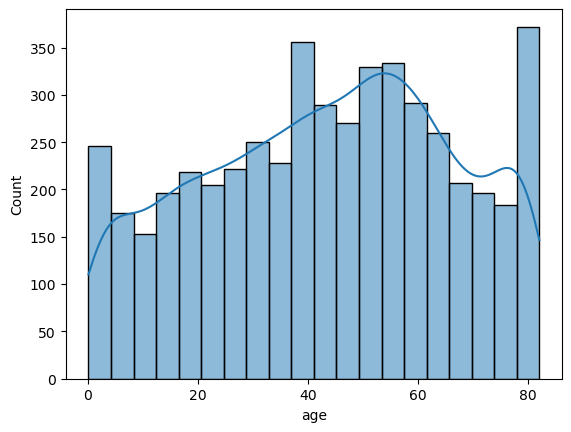

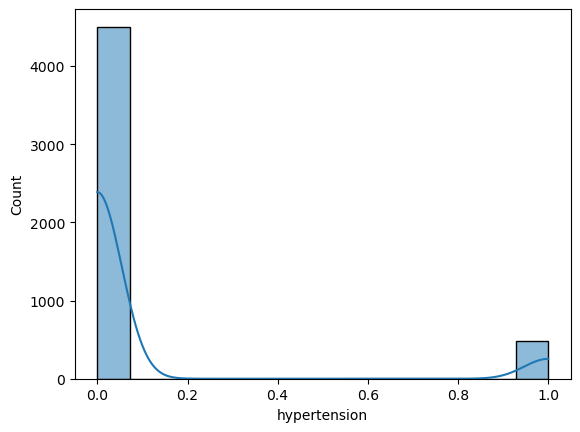

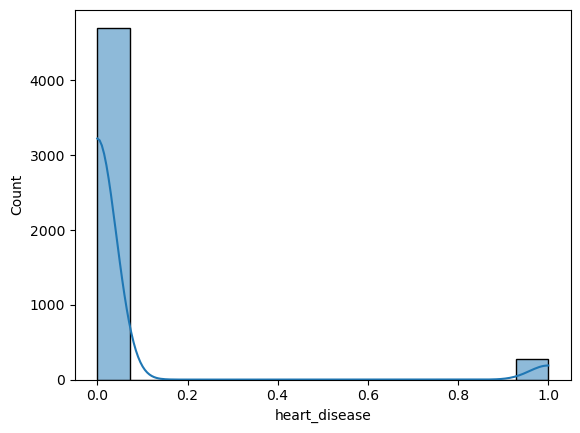

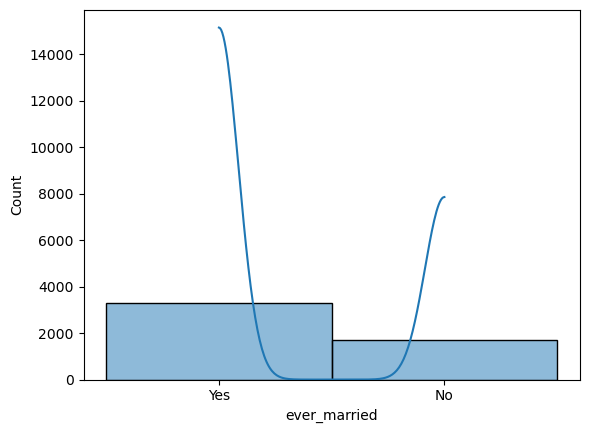

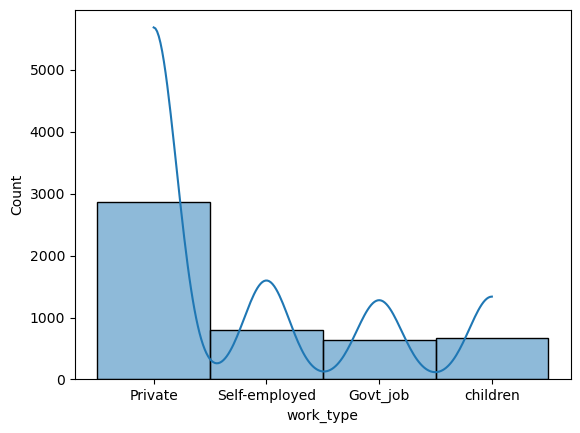

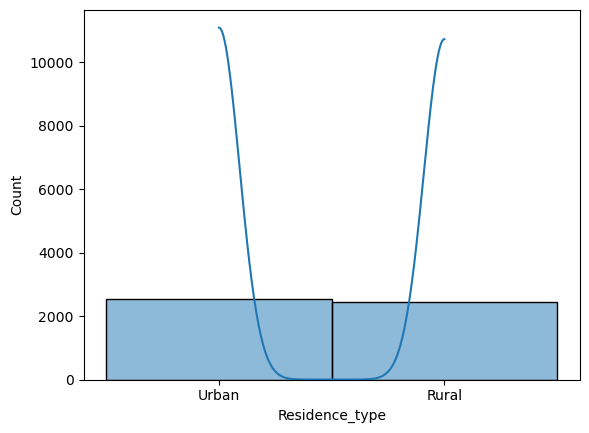

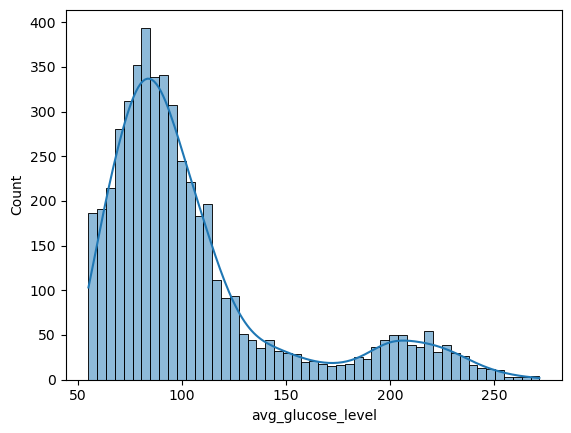

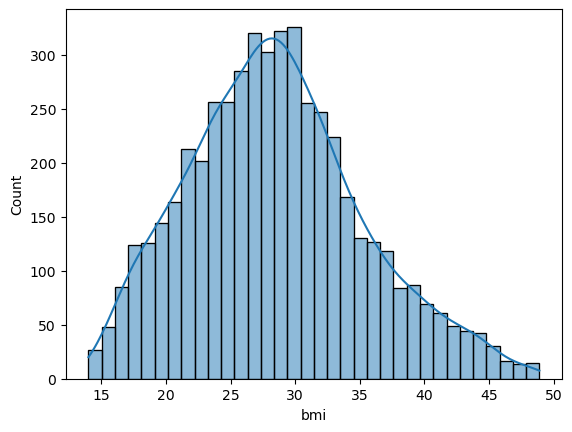

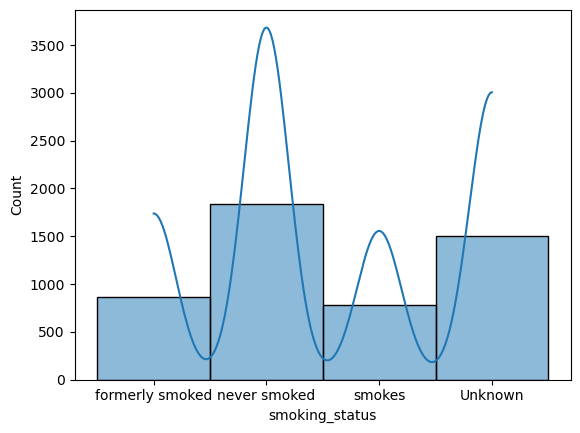

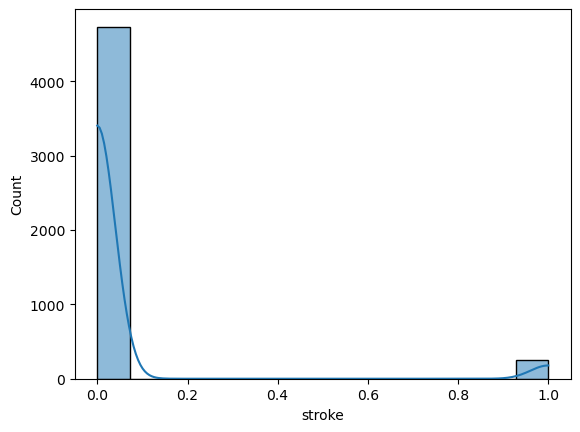

In [8]:
for i in data.columns:
    sns.histplot(data[i],kde=True)    # PLOT HISTPLOT TO SEE DATA DISTRIBUTION 
    plt.show()


In [9]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [10]:
x=data.groupby("gender")["stroke"].value_counts().reset_index()
x

,gender,stroke,count
0,Female,0,2767
1,Female,1,140
2,Male,0,1966
3,Male,1,108


<Axes: xlabel='gender', ylabel='count'>

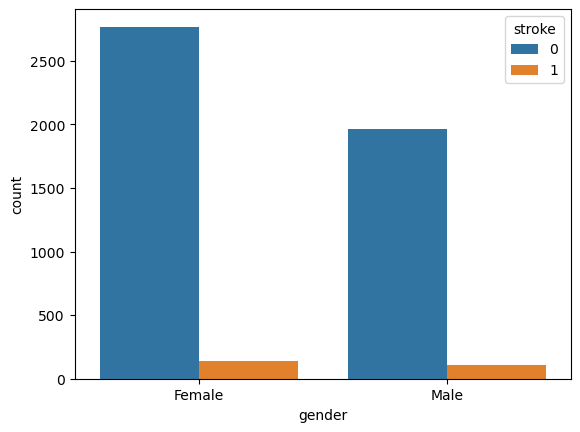

In [11]:
sns.barplot(data=x,x="gender",y="count",hue="stroke")

<Axes: xlabel='hypertension', ylabel='count'>

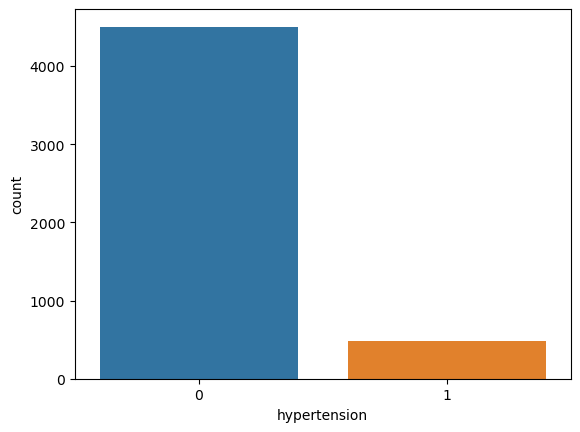

In [12]:
sns.countplot(data=data,x="hypertension")

In [13]:
data.groupby("stroke")["hypertension"].value_counts().reset_index()

,stroke,hypertension,count
0,0,0,4320
1,0,1,413
2,1,0,182
3,1,1,66


In [14]:
stroke_y=data.loc[data["stroke"]==1]
stroke_y

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
4816,Male,74.0,0,0,Yes,Private,Urban,167.13,28.7,Unknown,1
4817,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,31.7,smokes,1
4818,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1


In [16]:
x=pd.get_dummies(data[["smoking_status","gender","ever_married","work_type","Residence_type"]],drop_first=["smoking_status_Unknown","gender_Female","ever_married_No","work_type_Govt_job","Residence_type_Rural"]).replace({True:1,False:0}) 
x            # CONVERT CATEGORICAL COLUMNS INTO NUMERICAL USING DUMMIES

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,1,0,0,1,1,1,0,0,1
1,0,1,0,1,1,1,0,0,0
2,0,0,1,0,1,1,0,0,1
3,0,1,0,0,1,0,1,0,0
4,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
4976,1,0,0,1,0,1,0,0,0
4977,0,0,1,1,1,1,0,0,1
4978,0,0,1,0,1,0,0,0,0
4979,0,0,1,1,1,1,0,0,0


In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [18]:
data=pd.concat([data,x],axis=1).drop(columns=["smoking_status","ever_married","work_type","Residence_type","gender"])  
data                  # CONCATE DUMMIES DATA WITH ORIGINAL DATASET


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,1,0,0,1,1,1,0,0,1
1,80.0,0,1,105.92,32.5,1,0,1,0,1,1,1,0,0,0
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,1,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,1,0,0
4,81.0,0,0,186.21,29.0,1,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,0,1,0,1,0,0,0
4977,40.0,0,0,191.15,31.1,0,0,0,1,1,1,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,0,1,0,1,0,0,0,0
4979,40.0,0,0,83.94,30.0,0,0,0,1,1,1,1,0,0,0


In [19]:
data=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'gender_Male',
       'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Urban',
       'stroke']]

In [20]:
data.corr()*100            #CHECKING FOR CORRELATION BETWEEN FEATURES AND TARGET

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,stroke
age,100.000000,27.811956,26.485169,23.676268,37.370310,23.550811,12.261730,7.089943,-2.653843,67.713657,11.102048,32.683483,-63.686595,1.715450,24.647787
hypertension,27.811956,100.000000,11.197364,17.002767,15.876244,5.679747,6.526698,3.074894,2.148476,16.453409,-0.417718,11.046797,-12.892427,-0.475503,13.196524
heart_disease,26.485169,11.197364,100.000000,16.684657,6.092647,6.754129,-2.272694,4.401079,8.647553,11.476489,-0.160001,8.747408,-9.297401,0.212545,13.461031
avg_glucose_level,23.676268,17.002767,16.684657,100.000000,18.634817,6.698903,2.472661,1.787274,5.579594,15.072374,2.076356,5.841942,-10.196024,0.134561,13.322733
bmi,37.370310,15.876244,6.092647,18.634817,100.000000,12.015566,10.932215,10.071028,-1.209292,37.169006,21.182000,8.558153,-48.425704,1.318494,5.692566
smoking_status_formerly smoked,23.550811,5.679747,6.754129,6.698903,12.015566,100.000000,-35.105727,-19.720833,4.510887,17.203936,2.268483,9.218600,-16.130989,0.982495,6.532000
smoking_status_never smoked,12.261730,6.526698,-2.272694,2.472661,10.932215,-35.105727,100.000000,-32.850987,-10.238666,10.411985,10.993599,3.089779,-23.652935,-2.689246,-0.480609
smoking_status_smokes,7.089943,3.074894,4.401079,1.787274,10.071028,-19.720833,-32.850987,100.000000,1.334940,10.623449,9.676944,-0.339571,-16.655330,3.048988,0.856073
gender_Male,-2.653843,2.148476,8.647553,5.579594,-1.209292,4.510887,-10.238666,1.334940,100.000000,-2.897115,-2.870645,-2.963462,9.027526,-0.430116,0.886987
ever_married_Yes,67.713657,16.453409,11.476489,15.072374,37.169006,17.203936,10.411985,10.623449,-2.897115,100.000000,14.613875,19.166761,-54.885099,0.819076,10.839811


<Axes: >

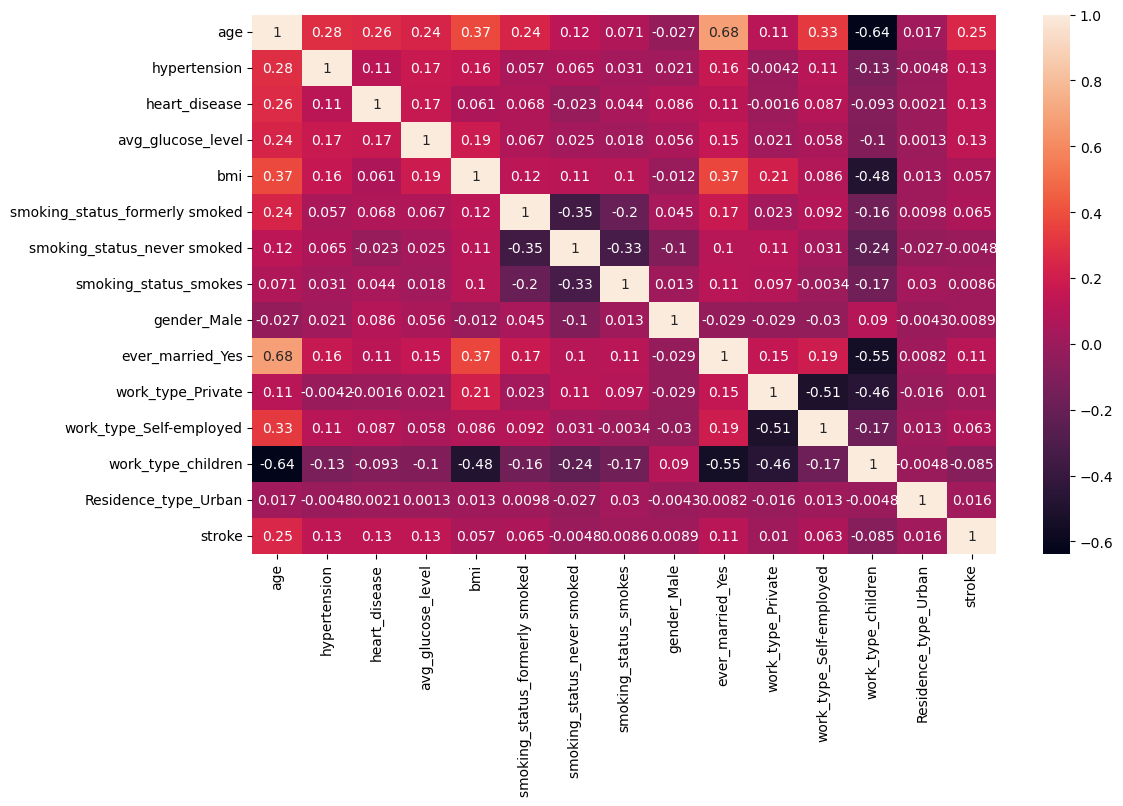

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

In [22]:
F=data[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Male', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban']]
T=data["stroke"]                                     # STORE DATA INTO FEATURES AND TARGET ACCORDINGLY

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(F,T)
                                                    # SPLIT THE DATASET INTO TRAIN AND TESTING DATA 

In [24]:
from sklearn.preprocessing import MinMaxScaler
M=MinMaxScaler()             # IMPORT MINMAX SCALER FOR STANDARDIZATION

In [25]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
4370,66.0,0,0,74.88,32.6,0,1,0,0,1,0,1,0,0
2625,70.0,1,0,118.81,26.0,0,0,1,1,1,0,1,0,0
1729,63.0,0,0,104.70,21.0,1,0,0,1,1,0,1,0,0
678,2.0,0,0,73.62,20.8,0,0,0,1,0,0,0,1,0
3190,71.0,1,1,67.06,26.7,0,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,65.0,0,0,95.88,28.5,0,1,0,1,1,0,1,0,1
1297,12.0,0,0,90.42,28.9,0,0,0,1,0,0,0,1,0
3966,25.0,0,0,229.94,23.5,0,1,0,1,0,1,0,0,0
4547,13.0,0,0,73.48,22.9,0,0,0,0,0,0,0,1,0


In [26]:
x_train[['avg_glucose_level','bmi']]=M.fit_transform(x_train[['avg_glucose_level','bmi']])
x_test[['avg_glucose_level','bmi']]=M.transform(x_test[['avg_glucose_level','bmi']])
    # FIT THE DATA INTO MODEL AND DO THE STANDARDIZATION

In [27]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
4370,66.0,0,0,0.091220,0.532951,0,1,0,0,1,0,1,0,0
2625,70.0,1,0,0.294017,0.343840,0,0,1,1,1,0,1,0,0
1729,63.0,0,0,0.228880,0.200573,1,0,0,1,1,0,1,0,0
678,2.0,0,0,0.085403,0.194842,0,0,0,1,0,0,0,1,0
3190,71.0,1,1,0.055120,0.363897,0,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,65.0,0,0,0.188164,0.415473,0,1,0,1,1,0,1,0,1
1297,12.0,0,0,0.162958,0.426934,0,0,0,1,0,0,0,1,0
3966,25.0,0,0,0.807035,0.272206,0,1,0,1,0,1,0,0,0
4547,13.0,0,0,0.084757,0.255014,0,0,0,0,0,0,0,1,0


In [28]:
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
3512,19.0,0,0,0.297572,0.309456,0,0,0,1,0,1,0,0,1
4717,38.0,0,0,0.264380,0.352436,0,0,0,1,0,1,0,0,0
2453,42.0,0,0,0.068646,0.916905,0,0,1,0,1,1,0,0,0
3784,2.0,0,0,0.157880,0.091691,0,0,0,1,0,0,0,1,1
1974,29.0,0,0,0.033930,0.584527,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,40.0,0,0,0.074231,0.375358,0,1,0,0,1,1,0,0,1
3088,47.0,0,0,0.078848,0.544413,0,0,0,1,1,1,0,0,0
1102,14.0,0,0,0.135445,0.223496,0,0,0,0,0,1,0,0,0
1005,18.0,0,0,0.225372,0.266476,0,1,0,1,0,1,0,0,0


## LOGISTIC REGRESSION:-

In [29]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()                                   #IMPORT LOGISTIC REGRESSION AND FIT
L.fit(x_train,y_train)

LogisticRegression()

In [30]:
L1=L.score(x_train,y_train)*100
L1                                #TRAINING ACCURACY

95.1004016064257

In [31]:
L2=L.score(x_test,y_test)*100
L2                               #TESTING ACCURACY

94.86356340288926

## SVC:-

In [32]:
from sklearn.svm import SVC
S=SVC()                                   #IMPORT SVC AND FIT
S.fit(x_train,y_train)

SVC()

In [33]:
S1=S.score(x_train,y_train)*100
S1                                #TRAINING ACCURACY

95.07362784471218

In [34]:
S2=S.score(x_test,y_test)*100
S2                                #TESTING ACCURACY

94.86356340288926

## NAIVES BAYES:-

In [35]:
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
G=GaussianNB()
C=ComplementNB() 
M=MultinomialNB()
B=BernoulliNB()                                        #IMPORT NAIVES BAYES AND FIT

### GaussianNB:

In [36]:
G.fit(x_train,y_train)

GaussianNB()

In [37]:
G1=G.score(x_train,y_train)*100
G1                               #TRAINING ACCURACY

83.02543507362785

In [38]:
G2=G.score(x_test,y_test)*100    #TESTING ACCURACY
G2

81.46067415730337

### BernoulliNB:

In [39]:
B.fit(x_train,y_train)

BernoulliNB()

In [40]:
B1=B.score(x_train,y_train)*100     #TRAINING ACCURACY
B1

94.80589022757697

In [41]:
B2=B.score(x_test,y_test)*100       #TESTING ACCURACY
B2

94.30176565008026

### ComplementNB:-

In [42]:
C.fit(x_train,y_train)

ComplementNB()

In [43]:
C1=C.score(x_train,y_train)*100      #TRAINING ACCURACY
C1

64.28380187416332

In [44]:
C2=C.score(x_test,y_test)*100       #TESTING ACCURACY
C2

60.75441412520064

### MultinomialNB:-

In [45]:
M.fit(x_train,y_train)     

MultinomialNB()

In [46]:
M1=M.score(x_train,y_train)*100      #TRAINING ACCURACY
M1

95.07362784471218

In [47]:
M2=M.score(x_test,y_test)*100      #TESTING ACCURACY
M2

94.86356340288926

## K NEAREST NEIGHBOUR:-

In [48]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()                                 #IMPORT K NEAREST NEIGHBOUR AND FIT

In [49]:
K.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
K1=K.score(x_train,y_train)*100     #TRAINING ACCURACY
K1

95.18072289156626

In [51]:
K2=K.score(x_test,y_test)*100
K2                                 #TESTING ACCURACY

94.70304975922953

## DECISION TREE CLASSIFIER:-

In [52]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()                         #IMPORT DECISION TREE CLASSIFIER AND FIT

In [53]:
D.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
DT1=D.score(x_train,y_train)*100        #TRAINING ACCURACY
DT1

100.0

In [55]:
DT2=D.score(x_test,y_test)*100
DT2                                     #TESTING ACCURACY

90.36918138041734

## ACCURACY GRAPH:-

In [58]:
A={"METHODS":["LOGISTIC REGRESSION","SVC","GAUSSIAN NB","BERNOULLI NB","COMPLEMENT NB","MULTINOMIAL NB","K NEAREST NEIGHBOUR","DECISION TREE CLASSIFIER"],"TRAIN ACCURACY":[L1,S1,G1,B1,C1,M1,K1,DT1],"TEST ACCURACY":[L2,S2,G2,B2,C2,M2,K2,DT2]}
A=pd.DataFrame(A)
A=np.around(A,2)
A

,METHODS,TRAIN ACCURACY,TEST ACCURACY
0,LOGISTIC REGRESSION,95.10,94.86
1,SVC,95.07,94.86
2,GAUSSIAN NB,83.03,81.46
3,BERNOULLI NB,94.81,94.30
4,COMPLEMENT NB,64.28,60.75
5,MULTINOMIAL NB,95.07,94.86
6,K NEAREST NEIGHBOUR,95.18,94.70
7,DECISION TREE CLASSIFIER,100.00,90.37


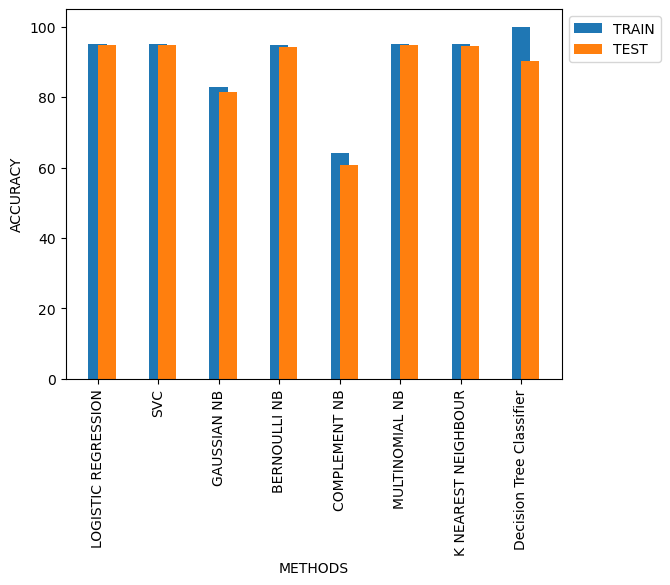

In [57]:
plt.bar(A["METHODS"],A["TRAIN ACCURACY"],width=0.3,label="TRAIN")                  
plt.bar(A["METHODS"],A["TEST ACCURACY"],align="edge",width=0.3,label="TEST")
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.xlabel("METHODS")
plt.ylabel("ACCURACY")
plt.xticks(rotation=90)
plt.show()                   # PLOT THE ACCURACY CHART BETWEEN ALL MODELS ACCURACIES

## CONCLUSION:
### FROM THE ABOVE BAR CHART IT IS CLEAR THAT SVC IS  BEST FOR CLASSIFICATION FOR THIS DATASET WITH 95% ACCURACY.